Prepare the dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
os.chdir('/content/drive/MyDrive/ML/TeamProject/crop')
os.getcwd()

'/content/drive/MyDrive/ML/TeamProject/crop'

In [4]:
import math
import numpy as np
import pandas as pd
from calendar import monthrange
from sklearn.preprocessing import MinMaxScaler

In [4]:
ds = pd.read_csv('./data_by_states_20230518.csv')
ds

,ID,state,temperature_avg,CDD,GDD,HDD,temperature_max,temperature_min,precipitation,snow_depth,snow_fall,sunlight_svm,sunlight_reg,crop,productions_spring,harvested_spring,cultivated_spring,productions_winter,harvested_winter,cultivated_winter
0,1900-01,AR,44.3,0.0,54.0,634.0,69.0,13.0,2.61,1.000000,3.032499,144.000000,144.000000,Rice,421763.145486,325571.428571,325571.428571,NaN,NaN,NaN
1,1900-02,AR,40.6,0.0,24.0,676.0,72.0,5.0,4.46,0.956964,0.100000,122.000000,122.000000,Rice,421763.145486,325571.428571,325571.428571,NaN,NaN,NaN
2,1900-03,AR,52.4,7.0,166.0,392.0,86.0,22.0,1.23,0.674807,0.966744,194.000000,194.000000,Rice,421763.145486,325571.428571,325571.428571,NaN,NaN,NaN
3,1900-04,AR,63.4,66.0,418.0,108.0,86.0,33.0,3.51,0.000000,0.000000,204.000000,204.000000,Rice,421763.145486,325571.428571,325571.428571,NaN,NaN,NaN
4,1900-05,AR,70.3,186.0,637.0,14.0,88.0,44.0,4.11,0.000000,0.000000,291.000000,291.000000,Rice,421763.145486,325571.428571,325571.428571,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13279,2022-08,SD,71.4,217.0,673.0,9.0,98.0,48.0,1.59,0.000000,0.000000,318.075706,342.089693,Wheat,700388.208000,19694.664000,26358.696000,1033119.36,730000.0,830000.0
13280,2022-09,SD,64.3,92.0,435.0,107.0,95.0,31.0,0.11,0.000000,0.000000,251.065685,277.714613,Wheat,700388.208000,19694.664000,26358.696000,1033119.36,730000.0,830000.0
13281,2022-10,SD,48.1,5.0,104.0,522.0,82.0,13.0,0.10,0.000000,1.000238,215.873366,221.266503,Wheat,700388.208000,19694.664000,26358.696000,1033119.36,730000.0,830000.0
13282,2022-11,SD,28.3,0.0,11.0,1095.0,75.0,5.0,0.68,2.000000,3.300000,156.850476,145.225388,Wheat,700388.208000,19694.664000,26358.696000,1033119.36,730000.0,830000.0


In [5]:
da = pd.read_csv('./data_by_all_20230518.csv')
da

,ID,fertilizer_price_index_all,fertilizer_price_index_nitrogen,fertilizer_price_index_phosphate,oil_price,meat_total(kg/capita),meat_total_us(lb/capita),fruits(kg/capita),vegetable(kg/capita),coffee_us(gal/capita),...,population_world,population_asia_all,population_asia_east&southeast,cpi_us,gini_us,harvestedarea_rice_asia(ha),yield_rice_asia(hg/ha),production_rice_asia(ton),food_consumption_us(kcal),crop_price_us
0,1900-01,2.687540,9.292814,1.000000,7.483910,10.803852,80.945119,34.539159,11.243287,31.117215,...,3.129322e+05,5.641570e+04,9.666280e+04,8.664286,26.981158,8.572384e+07,5954.000000,6.884081e+07,3007.102825,106.0
1,1900-02,2.701685,9.297349,1.000000,7.483910,10.803852,80.945119,34.539159,11.243287,31.117215,...,3.165401e+05,5.859826e+04,9.788104e+04,8.671429,26.991586,8.576468e+07,5971.000000,6.884081e+07,3007.738058,106.0
2,1900-03,2.715830,9.301883,1.000000,7.483910,10.803852,80.945119,34.539159,11.243287,31.117215,...,3.201480e+05,6.078082e+04,9.909929e+04,8.678571,27.002013,8.580553e+07,5988.000000,6.884081e+07,3008.373292,106.0
3,1900-04,2.729975,9.306417,1.000000,7.483910,10.803852,80.945119,34.539159,11.243287,31.117215,...,3.237559e+05,6.296338e+04,1.003175e+05,8.685714,27.012441,8.584637e+07,6005.000000,6.884081e+07,3009.008525,106.0
4,1900-05,2.744120,9.310951,1.000000,7.483910,10.803852,80.945119,34.539159,11.243287,31.117215,...,3.273638e+05,6.514595e+04,1.015358e+05,8.692857,27.022868,8.588721e+07,6022.000000,6.884081e+07,3009.643758,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,2022-08,84.669442,85.799127,76.915370,319.321114,50.831212,196.200895,85.911032,99.962722,28.765632,...,7.980680e+06,4.725014e+06,2.344734e+06,296.171000,42.320014,1.458053e+08,49736.511905,7.063983e+08,3941.531195,1074.0
1472,2022-09,84.784497,85.918256,77.023596,319.610231,50.831212,196.200895,85.911032,99.962722,28.765632,...,7.986254e+06,4.727392e+06,2.345143e+06,296.808000,42.330441,1.458461e+08,49770.705357,7.070261e+08,3942.166428,1074.0
1473,2022-10,84.899552,86.037386,77.131823,319.899347,50.831212,196.200895,85.911032,99.962722,28.765632,...,7.991829e+06,4.729771e+06,2.345551e+06,298.012000,42.340869,1.458870e+08,49804.898810,7.076538e+08,3942.801662,1074.0
1474,2022-11,85.014608,86.156516,77.240050,320.188464,50.831212,196.200895,85.911032,99.962722,28.765632,...,7.997403e+06,4.732150e+06,2.345960e+06,297.711000,42.351296,1.459278e+08,49839.092262,7.082816e+08,3943.436895,1074.0


Add Gaussian Noise

In [6]:
ds_aug = pd.DataFrame(columns=ds.columns)

for state in ds['state'].unique():
    df = ds[ds['state'] == state]

    for index, row in df.iterrows():
        string_labels = ['ID', 'state', 'crop']
        new_rows = list()
        name_list = list()
        columns_list = list()

        ym_split = row['ID'].split('-')
        num_make = monthrange(*[int(x) for x in ym_split])[1]

        for column in df:
            if column in string_labels:
                name_list.append(row[column])
                continue

            try:
                std_original = df[column].std()
                std_noise = math.sqrt(std_original)
                if std_noise > std_original:
                    std_noise = std_original

                noise = np.random.normal(row[column], std_noise, num_make)
                new_rows.append(noise)
                columns_list.append(column)

            except TypeError:
                pass

        df_append = pd.DataFrame(data=np.array(new_rows).T, columns=columns_list)
        for column, name in zip(string_labels, name_list):
            df_append[column] = name
        df_append['ID'] = df_append['ID'] + '-' + (df_append.index + 1).map(str).str.zfill(2)
        
        ds_aug = pd.concat([ds_aug, df_append], ignore_index=True)

In [7]:
ds_aug

,ID,state,temperature_avg,CDD,GDD,HDD,temperature_max,temperature_min,precipitation,snow_depth,snow_fall,sunlight_svm,sunlight_reg,crop,productions_spring,harvested_spring,cultivated_spring,productions_winter,harvested_winter,cultivated_winter
0,1900-01-01,AR,47.173662,-12.115593,44.117506,649.390440,72.079649,13.916116,0.256513,0.005637,1.603309,131.568901,139.135936,Rice,422942.927224,325110.887874,326071.345423,NaN,NaN,NaN
1,1900-01-02,AR,42.051391,-13.958331,81.413587,631.628905,60.944848,9.709537,1.931322,0.390185,2.946015,132.393201,135.359499,Rice,421790.494253,324906.411477,325160.251922,NaN,NaN,NaN
2,1900-01-03,AR,34.510016,-12.166007,64.312367,630.959669,68.883770,12.857056,3.668341,1.734925,2.227128,140.185169,132.009374,Rice,421185.737004,324918.906820,324778.705806,NaN,NaN,NaN
3,1900-01-04,AR,53.947033,25.016308,41.874571,623.461860,69.093292,16.289875,0.812027,-0.637009,3.418207,144.765059,147.019606,Rice,424008.729563,325859.674297,325886.555974,NaN,NaN,NaN
4,1900-01-05,AR,49.027068,-10.314929,24.144409,616.100869,62.490919,8.631621,0.097434,-0.444561,5.441771,148.955200,143.068738,Rice,422569.944579,326187.720207,324885.567210,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404320,2022-12-27,SD,13.512594,9.757802,-8.786100,1603.059691,39.613792,-19.308526,2.201447,7.303208,15.054163,137.497070,168.189411,Wheat,700397.659567,19572.257910,26463.408492,1.032705e+06,730509.034249,830477.326441
404321,2022-12-28,SD,11.196878,-2.564865,7.568389,1611.314538,44.376071,-22.910518,2.328465,10.069162,19.244859,133.103925,141.441432,Wheat,699951.724455,19882.909556,26661.861438,1.033183e+06,729436.305974,828271.030923
404322,2022-12-29,SD,11.051617,2.296407,-16.182631,1622.286078,46.631709,-21.714675,0.422951,11.271271,20.026220,142.607361,157.733599,Wheat,699846.337601,19903.096630,26418.552868,1.032533e+06,730625.825733,831421.822892
404323,2022-12-30,SD,13.810263,-8.959800,-18.424778,1665.133693,40.669219,-20.859983,2.441994,14.294123,15.050433,144.810755,156.334374,Wheat,700403.066966,19717.445131,26525.856984,1.033040e+06,728552.729211,831123.728354


In [8]:
da_aug = pd.DataFrame(columns=da.columns)

for state in ['_']:
    df = da

    for index, row in df.iterrows():
        string_labels = ['ID']
        new_rows = list()
        name_list = list()
        columns_list = list()

        ym_split = row['ID'].split('-')
        num_make = monthrange(*[int(x) for x in ym_split])[1]

        for column in df:
            if column in string_labels:
                name_list.append(row[column])
                continue

            try:
                std_original = df[column].std()
                std_noise = math.sqrt(std_original)
                if std_noise > std_original:
                    std_noise = std_original

                noise = np.random.normal(row[column], std_noise, num_make)
                new_rows.append(noise)
                columns_list.append(column)

            except TypeError:
                pass

        df_append = pd.DataFrame(data=np.array(new_rows).T, columns=columns_list)
        for column, name in zip(string_labels, name_list):
            df_append[column] = name
        df_append['ID'] = df_append['ID'] + '-' + (df_append.index + 1).map(str).str.zfill(2)
        
        da_aug = pd.concat([da_aug, df_append], ignore_index=True)

In [9]:
da_aug

,ID,fertilizer_price_index_all,fertilizer_price_index_nitrogen,fertilizer_price_index_phosphate,oil_price,meat_total(kg/capita),meat_total_us(lb/capita),fruits(kg/capita),vegetable(kg/capita),coffee_us(gal/capita),...,population_world,population_asia_all,population_asia_east&southeast,cpi_us,gini_us,harvestedarea_rice_asia(ha),yield_rice_asia(hg/ha),production_rice_asia(ton),food_consumption_us(kcal),crop_price_us
0,1900-01-01,-2.527089,4.100113,2.755721,-4.147999,8.730101,92.468950,34.042319,6.080338,32.505461,...,3.149451e+05,5.495125e+04,9.693614e+04,2.995776,29.426869,8.572507e+07,6021.581537,6.882889e+07,3018.732837,142.403293
1,1900-01-02,2.531840,12.399100,-5.069472,30.672024,7.820285,83.822862,35.167487,5.393391,29.120251,...,3.146660e+05,5.549243e+04,9.740827e+04,0.097256,25.142992,8.572775e+07,6163.006496,6.885577e+07,2990.384483,90.769805
2,1900-01-03,2.319957,4.139447,2.256980,-0.649725,18.575076,82.589223,32.181682,11.154865,29.224735,...,3.125476e+05,5.774735e+04,9.711328e+04,9.110424,26.986143,8.572468e+07,6044.641467,6.883457e+07,3001.888741,93.786026
3,1900-01-04,3.629629,4.426119,7.587292,-7.394628,11.641948,80.619545,36.266799,9.626422,32.848492,...,3.136465e+05,5.535567e+04,9.730342e+04,5.266802,24.568418,8.572104e+07,5986.869574,6.885872e+07,3011.009476,113.111532
4,1900-01-05,10.430869,19.369450,10.686877,2.531312,6.358894,83.877025,38.338661,8.268731,30.391019,...,3.090473e+05,5.666186e+04,9.737758e+04,24.205927,25.672091,8.571768e+07,6091.475666,6.885242e+07,3000.665175,92.502681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44920,2022-12-27,76.477421,89.710841,83.431679,310.225257,49.565946,197.518800,90.715043,103.214068,28.855678,...,8.004990e+06,4.733068e+06,2.348586e+06,300.165187,39.950237,1.459712e+08,49994.943364,7.089010e+08,3935.696896,1052.042033
44921,2022-12-28,90.281309,83.692148,85.505317,321.981456,50.376903,200.483681,89.210310,101.530820,29.117731,...,8.003712e+06,4.735758e+06,2.346054e+06,295.734804,42.543260,1.459692e+08,49718.142936,7.089049e+08,3941.267920,1077.545489
44922,2022-12-29,79.747175,90.240095,77.056923,328.649553,49.903120,193.486408,90.483763,101.250723,26.914673,...,8.001483e+06,4.735879e+06,2.347366e+06,290.221441,40.855148,1.459701e+08,49797.765037,7.088914e+08,3957.035868,1063.936659
44923,2022-12-30,81.644080,85.097174,81.681017,324.694189,52.743992,193.068591,83.186721,92.064325,28.097896,...,8.003052e+06,4.732809e+06,2.346957e+06,296.971221,37.918042,1.459716e+08,49834.786930,7.089210e+08,3950.486194,1096.859363


In [10]:
ds_aug.to_csv('./data_by_states_gaussiannoise.csv', index=False)
da_aug.to_csv('./data_by_all_gaussiannoise.csv', index=False)

Min-max Scailing

잡음을 넣어서 정상적인 Range를 벗어난 숫자값들이 있습니다. Scailing을 필수적으로 해주어야 합니다.

스케일링은 반드시 Train Set, Validation Set, Test Set 각각 별도로 해야 한다는 것 잊지 마세요! (여기 예제에서는 구분하지 않고 보여줍니다.)

In [11]:
scaler = MinMaxScaler()

former = ds_aug.loc[:, ['ID', 'state', 'crop']]
latter = ds_aug[ds_aug.columns.difference(['ID', 'state', 'crop'])]

fitted = scaler.fit(latter)
output_latter = scaler.transform(latter)
output_latter = pd.DataFrame(output_latter, columns=latter.columns, index=list(latter.index.values))
ds_minmax = pd.concat([former, output_latter], axis=1)

In [12]:
scaler = MinMaxScaler()

former = da_aug.loc[:, ['ID']]
latter = da_aug[da_aug.columns.difference(['ID'])]

fitted = scaler.fit(latter)
output_latter = scaler.transform(latter)
output_latter = pd.DataFrame(output_latter, columns=latter.columns, index=list(latter.index.values))
da_minmax = pd.concat([former, output_latter], axis=1)

In [13]:
ds_minmax.to_csv('./data_by_states_minmax.csv', index=False)
da_minmax.to_csv('./data_by_all_minmax.csv', index=False)

Scaler만 변경하면 정규분포 표준화도 똑같이 할 수 있습니다.

그런데 선형 관계에 있는 Feature가 많아서 선형적으로 분석해야 결과가 잘 나올 것이라고 생각합니다.

## EDA

In [8]:
da = pd.read_csv('./data_by_all_minmax.csv')
da

,ID,co2(ppm),cocoa_us(lb/capita),coffee_us(gal/capita),cpi_us,crop_price_us,fertilizer_price_index_all,fertilizer_price_index_nitrogen,fertilizer_price_index_phosphate,food_consumption_us(kcal),...,oil_price,population_asia_all,population_asia_east&southeast,population_us_asian,population_us_total,population_world,production_rice_asia(ton),tea_us(gal/capita),vegetable(kg/capita),yield_rice_asia(hg/ha)
0,1900-01-01,0.046444,0.541568,0.465726,0.082309,0.121409,0.082236,0.111663,0.129954,0.043873,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
1,1900-01-02,0.072887,0.310295,0.387171,0.074001,0.074615,0.115634,0.175101,0.083252,0.021675,...,0.097851,0.000116,0.000997,0.000220,0.000095,0.000730,0.000119,0.490494,0.104572,0.012277
2,1900-01-03,0.124461,0.207464,0.389595,0.099834,0.077348,0.114235,0.111964,0.126977,0.030683,...,0.058268,0.000597,0.000866,0.000105,0.000076,0.000455,0.000086,0.550386,0.150626,0.009619
3,1900-01-04,0.099993,0.377703,0.473686,0.088818,0.094862,0.122881,0.114155,0.158789,0.037825,...,0.049745,0.000086,0.000950,0.000212,0.000130,0.000598,0.000124,0.502114,0.138408,0.008321
4,1900-01-05,0.137223,0.269425,0.416660,0.143099,0.076185,0.167781,0.228383,0.177287,0.029725,...,0.062288,0.000365,0.000983,0.000124,0.000170,0.000000,0.000114,0.397962,0.127556,0.010671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44920,2022-12-27,0.882888,0.749976,0.381031,0.934022,0.945785,0.603801,0.766077,0.611435,0.761884,...,0.451132,0.999170,1.000000,0.999695,0.981139,0.999899,0.999944,0.331163,0.886504,0.996878
44921,2022-12-28,0.853700,0.705399,0.387112,0.921324,0.968898,0.694930,0.720070,0.623811,0.766247,...,0.465989,0.999745,0.998876,0.999754,0.981066,0.999733,0.999951,0.532926,0.873049,0.990661
44922,2022-12-29,0.915107,0.642443,0.335989,0.905522,0.956565,0.625386,0.770123,0.573390,0.778594,...,0.474416,0.999771,0.999459,0.999817,0.981064,0.999443,0.999929,0.422415,0.870810,0.992449
44923,2022-12-30,0.869825,0.690502,0.363447,0.924867,0.986402,0.637909,0.730810,0.600987,0.773465,...,0.469417,0.999115,0.999277,0.999929,0.981072,0.999647,0.999976,0.392262,0.797378,0.993281


In [9]:
ds=pd.read_csv('./data_by_states_minmax.csv')
ds

,ID,state,crop,CDD,GDD,HDD,cultivated_spring,cultivated_winter,harvested_spring,harvested_winter,precipitation,productions_spring,productions_winter,snow_depth,snow_fall,sunlight_reg,sunlight_svm,temperature_avg,temperature_max,temperature_min
0,1900-01-01,AR,Rice,0.054184,0.080683,0.302860,0.022142,NaN,0.022492,NaN,0.185956,0.005946,NaN,0.180536,0.184017,0.276881,0.279967,0.554825,0.519250,0.501030
1,1900-01-02,AR,Rice,0.052183,0.107473,0.295603,0.022079,NaN,0.022478,NaN,0.233659,0.005929,NaN,0.187801,0.205554,0.268070,0.281905,0.513285,0.421878,0.471597
2,1900-01-03,AR,Rice,0.054129,0.095189,0.295330,0.022052,NaN,0.022479,NaN,0.283135,0.005920,NaN,0.213204,0.194023,0.260254,0.300227,0.452127,0.491303,0.493620
3,1900-01-04,AR,Rice,0.094506,0.079072,0.292267,0.022129,NaN,0.022544,NaN,0.201779,0.005961,NaN,0.168396,0.213127,0.295274,0.310996,0.609754,0.493135,0.517639
4,1900-01-05,AR,Rice,0.056139,0.066336,0.289259,0.022060,NaN,0.022567,NaN,0.181425,0.005940,NaN,0.172032,0.245585,0.286056,0.320849,0.569855,0.435398,0.464055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404320,2022-12-27,SD,Wheat,0.077937,0.042682,0.692502,0.001332,0.395284,0.001174,0.367181,0.241353,0.009920,0.364471,0.318394,0.399763,0.344665,0.293906,0.281846,0.235341,0.268562
404321,2022-12-28,SD,Wheat,0.064555,0.054430,0.695874,0.001345,0.394235,0.001196,0.366639,0.244971,0.009913,0.364639,0.370645,0.466980,0.282260,0.283576,0.263067,0.276986,0.243359
404322,2022-12-29,SD,Wheat,0.069834,0.037369,0.700357,0.001328,0.395733,0.001197,0.367240,0.190697,0.009912,0.364409,0.393354,0.479513,0.320271,0.305923,0.261889,0.296711,0.251726
404323,2022-12-30,SD,Wheat,0.057611,0.035759,0.717863,0.001336,0.395591,0.001184,0.366192,0.248205,0.009920,0.364589,0.450458,0.399703,0.317006,0.311104,0.284260,0.244570,0.257706


In [10]:
# ID를 기준으로 dataframe merge
df=pd.merge(ds,da,on='ID')

In [11]:
df

,ID,state,crop,CDD,GDD,HDD,cultivated_spring,cultivated_winter,harvested_spring,harvested_winter,...,oil_price,population_asia_all,population_asia_east&southeast,population_us_asian,population_us_total,population_world,production_rice_asia(ton),tea_us(gal/capita),vegetable(kg/capita),yield_rice_asia(hg/ha)
0,1900-01-01,AR,Rice,0.054184,0.080683,0.302860,0.022142,NaN,0.022492,NaN,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
1,1900-01-01,CA,Rice,0.074457,0.080046,0.262077,0.007419,NaN,0.007826,NaN,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
2,1900-01-01,IA,Corn,0.080672,0.056405,0.520117,0.521010,NaN,0.286800,NaN,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
3,1900-01-01,IL,Corn,0.049038,0.038830,0.492170,0.587570,NaN,0.581757,NaN,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
4,1900-01-01,LA,Rice,0.069548,0.120166,0.241880,0.059483,NaN,0.060024,NaN,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404320,2022-12-31,LA,Rice,0.138560,0.233086,0.199425,0.029020,NaN,0.028788,NaN,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854
404321,2022-12-31,MN,Wheat,0.046775,0.029382,0.639218,0.001612,0.000314,0.001290,0.001349,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854
404322,2022-12-31,ND,Wheat,0.064426,0.043699,0.748618,0.010999,0.050261,0.011281,0.045748,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854
404323,2022-12-31,NE,Corn,0.048696,0.049146,0.534851,0.666504,NaN,0.645039,NaN,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854


In [12]:
# 작물이름에 따라 groupby
grouped = df.groupby('crop')
grouped.get_group('Rice')

,ID,state,crop,CDD,GDD,HDD,cultivated_spring,cultivated_winter,harvested_spring,harvested_winter,...,oil_price,population_asia_all,population_asia_east&southeast,population_us_asian,population_us_total,population_world,production_rice_asia(ton),tea_us(gal/capita),vegetable(kg/capita),yield_rice_asia(hg/ha)
0,1900-01-01,AR,Rice,0.054184,0.080683,0.302860,0.022142,NaN,0.022492,NaN,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
1,1900-01-01,CA,Rice,0.074457,0.080046,0.262077,0.007419,NaN,0.007826,NaN,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
4,1900-01-01,LA,Rice,0.069548,0.120166,0.241880,0.059483,NaN,0.060024,NaN,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
9,1900-01-02,AR,Rice,0.052183,0.107473,0.295603,0.022079,NaN,0.022478,NaN,...,0.097851,0.000116,0.000997,0.000220,0.000095,0.000730,0.000119,0.490494,0.104572,0.012277
10,1900-01-02,CA,Rice,0.052692,0.079904,0.259172,0.007467,NaN,0.007860,NaN,...,0.097851,0.000116,0.000997,0.000220,0.000095,0.000730,0.000119,0.490494,0.104572,0.012277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404308,2022-12-30,CA,Rice,0.076181,0.036676,0.281345,0.017312,NaN,0.017535,NaN,...,0.469417,0.999115,0.999277,0.999929,0.981072,0.999647,0.999976,0.392262,0.797378,0.993281
404311,2022-12-30,LA,Rice,0.082614,0.231412,0.215017,0.029013,NaN,0.028791,NaN,...,0.469417,0.999115,0.999277,0.999929,0.981072,0.999647,0.999976,0.392262,0.797378,0.993281
404316,2022-12-31,AR,Rice,0.070245,0.105452,0.277277,0.076295,NaN,0.075364,NaN,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854
404317,2022-12-31,CA,Rice,0.066105,0.053607,0.286163,0.017264,NaN,0.017545,NaN,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854


In [13]:
group_dict = {}  # 그룹을 저장할 딕셔너리
for group_id, group_df in grouped:
    if group_id!='Wheat':
        print(group_id)
        group_df=group_df.drop(labels=['productions_winter','harvested_winter','cultivated_winter'],axis=1)
        group_df=group_df.rename(columns={'productions_spring':'productions','harvested_spring':'harvested','cultivated_spring':'cultivated'})
        group_dict[group_id]=group_df
    else:
        print(group_id)
        winter=group_df.copy()
        winter=winter.drop(labels=['productions_spring', 'harvested_spring', 'cultivated_spring'],axis=1)
        winter = winter.rename(columns={'productions_winter': 'productions', 'harvested_winter': 'harvested','cultivated_winter':'cultivated'})

        spring=group_df.copy()
        spring=spring.drop(labels=['productions_winter', 'harvested_winter', 'cultivated_winter'],axis=1)
        spring = spring.rename(columns={'productions_spring': 'productions', 'harvested_spring': 'harvested','cultivated_spring':'cultivated'})

        group_dict['Winter_wheat']=winter
        group_dict['Spring_wheat']=spring

Corn
Rice
Wheat


옥수수 전체 데이터

In [15]:
data_corn=group_dict['Corn']
data_corn
data_corn.to_csv('./final_data_corn.csv', index=False)

쌀 전체 데이터

In [16]:
data_rice=group_dict['Rice']
data_rice.to_csv('./final_data_rice.csv', index=False)
data_rice

,ID,state,crop,CDD,GDD,HDD,cultivated,harvested,precipitation,productions,...,oil_price,population_asia_all,population_asia_east&southeast,population_us_asian,population_us_total,population_world,production_rice_asia(ton),tea_us(gal/capita),vegetable(kg/capita),yield_rice_asia(hg/ha)
0,1900-01-01,AR,Rice,0.054184,0.080683,0.302860,0.022142,0.022492,0.185956,0.005946,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
1,1900-01-01,CA,Rice,0.074457,0.080046,0.262077,0.007419,0.007826,0.214878,0.000164,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
4,1900-01-01,LA,Rice,0.069548,0.120166,0.241880,0.059483,0.060024,0.329578,0.008016,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
9,1900-01-02,AR,Rice,0.052183,0.107473,0.295603,0.022079,0.022478,0.233659,0.005929,...,0.097851,0.000116,0.000997,0.000220,0.000095,0.000730,0.000119,0.490494,0.104572,0.012277
10,1900-01-02,CA,Rice,0.052692,0.079904,0.259172,0.007467,0.007860,0.219114,0.000141,...,0.097851,0.000116,0.000997,0.000220,0.000095,0.000730,0.000119,0.490494,0.104572,0.012277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404308,2022-12-30,CA,Rice,0.076181,0.036676,0.281345,0.017312,0.017535,0.416241,0.014328,...,0.469417,0.999115,0.999277,0.999929,0.981072,0.999647,0.999976,0.392262,0.797378,0.993281
404311,2022-12-30,LA,Rice,0.082614,0.231412,0.215017,0.029013,0.028791,0.307037,0.017850,...,0.469417,0.999115,0.999277,0.999929,0.981072,0.999647,0.999976,0.392262,0.797378,0.993281
404316,2022-12-31,AR,Rice,0.070245,0.105452,0.277277,0.076295,0.075364,0.415389,0.052096,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854
404317,2022-12-31,CA,Rice,0.066105,0.053607,0.286163,0.017264,0.017545,0.432042,0.014344,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854


겨울철 밀 전체 데이터


In [17]:
data_winter_wheat=group_dict['Winter_wheat']
data_winter_wheat.to_csv('./final_data_winter_wheat.csv', index=False)
data_winter_wheat

,ID,state,crop,CDD,GDD,HDD,cultivated,harvested,precipitation,productions,...,oil_price,population_asia_all,population_asia_east&southeast,population_us_asian,population_us_total,population_world,production_rice_asia(ton),tea_us(gal/capita),vegetable(kg/capita),yield_rice_asia(hg/ha)
5,1900-01-01,MN,Wheat,0.067328,0.051007,0.586940,0.007593,0.008983,0.113081,0.001695,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
6,1900-01-01,ND,Wheat,0.072513,0.061522,0.607532,0.038526,0.065486,0.161181,0.047411,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
8,1900-01-01,SD,Wheat,0.069404,0.031823,0.739172,0.004326,0.016647,0.247743,0.000673,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
14,1900-01-02,MN,Wheat,0.081879,0.041170,0.588416,0.007475,0.008666,0.208670,0.001804,...,0.097851,0.000116,0.000997,0.000220,0.000095,0.000730,0.000119,0.490494,0.104572,0.012277
15,1900-01-02,ND,Wheat,0.060792,0.056047,0.630552,0.039120,0.065437,0.137345,0.047495,...,0.097851,0.000116,0.000997,0.000220,0.000095,0.000730,0.000119,0.490494,0.104572,0.012277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404313,2022-12-30,ND,Wheat,0.061279,0.045681,0.738038,0.050285,0.045902,0.190662,0.054494,...,0.469417,0.999115,0.999277,0.999929,0.981072,0.999647,0.999976,0.392262,0.797378,0.993281
404315,2022-12-30,SD,Wheat,0.057611,0.035759,0.717863,0.395591,0.366192,0.248205,0.364589,...,0.469417,0.999115,0.999277,0.999929,0.981072,0.999647,0.999976,0.392262,0.797378,0.993281
404321,2022-12-31,MN,Wheat,0.046775,0.029382,0.639218,0.000314,0.001349,0.237075,0.002230,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854
404322,2022-12-31,ND,Wheat,0.064426,0.043699,0.748618,0.050261,0.045748,0.223115,0.054445,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854


봄철 밀 전체 데이터

In [18]:
data_spring_wheat=group_dict['Spring_wheat']
data_spring_wheat.to_csv('./final_data_spring_wheat.csv', index=False)
data_spring_wheat

,ID,state,crop,CDD,GDD,HDD,cultivated,harvested,precipitation,productions,...,oil_price,population_asia_all,population_asia_east&southeast,population_us_asian,population_us_total,population_world,production_rice_asia(ton),tea_us(gal/capita),vegetable(kg/capita),yield_rice_asia(hg/ha)
5,1900-01-01,MN,Wheat,0.067328,0.051007,0.586940,0.007986,0.008541,0.113081,0.033009,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
6,1900-01-01,ND,Wheat,0.072513,0.061522,0.607532,0.013301,0.026688,0.161181,0.094847,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
8,1900-01-01,SD,Wheat,0.069404,0.031823,0.739172,0.000024,0.001669,0.247743,0.001292,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
14,1900-01-02,MN,Wheat,0.081879,0.041170,0.588416,0.007964,0.008518,0.208670,0.033024,...,0.097851,0.000116,0.000997,0.000220,0.000095,0.000730,0.000119,0.490494,0.104572,0.012277
15,1900-01-02,ND,Wheat,0.060792,0.056047,0.630552,0.013323,0.026687,0.137345,0.094827,...,0.097851,0.000116,0.000997,0.000220,0.000095,0.000730,0.000119,0.490494,0.104572,0.012277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404313,2022-12-30,ND,Wheat,0.061279,0.045681,0.738038,0.011020,0.011293,0.190662,0.114576,...,0.469417,0.999115,0.999277,0.999929,0.981072,0.999647,0.999976,0.392262,0.797378,0.993281
404315,2022-12-30,SD,Wheat,0.057611,0.035759,0.717863,0.001336,0.001184,0.248205,0.009920,...,0.469417,0.999115,0.999277,0.999929,0.981072,0.999647,0.999976,0.392262,0.797378,0.993281
404321,2022-12-31,MN,Wheat,0.046775,0.029382,0.639218,0.001612,0.001290,0.237075,0.046413,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854
404322,2022-12-31,ND,Wheat,0.064426,0.043699,0.748618,0.010999,0.011281,0.223115,0.114559,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

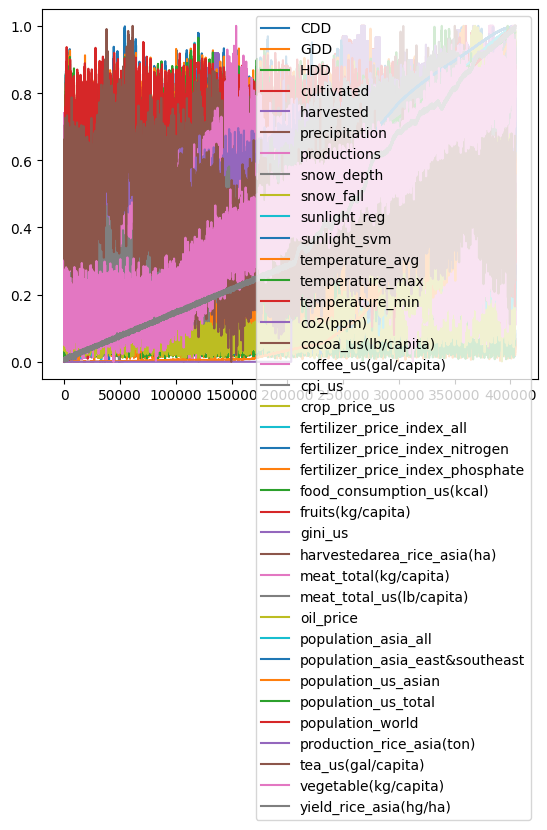

In [20]:
data_corn.plot()

productions와 feature간의 상관관계

In [23]:
# 'productions', 'id', 'state', 'crop', 'productions'을 제외한 열들 선택
columns_to_plot = data_corn.columns.difference(['productions', 'ID', 'state', 'crop'])

# 각 열에 대한 변화를 'productions'과 연관지어 시각화
for column in columns_to_plot:
    print(column)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data_corn, x='productions', y=column)
    plt.xlabel('Productions')
    plt.ylabel(column)
    plt.title(f'Variation of {column} with Productions')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

ID(시간순)와 feature간의 상관관계

In [26]:
# 'productions', 'id', 'state', 'crop', 'productions'을 제외한 열들 선택
columns_to_plot = data_corn.columns.difference(['ID', 'state', 'crop'])

# 각 열에 대한 변화를 'productions'과 연관지어 시각화
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data_corn, x=data_corn.index, y=column)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Variation of {column} with Index')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

옥수수에 대해 productions에 대한 상관관계(두 변수 간의 선형적인 관계의 강도)가 높은 순








In [55]:
data_corn.corr()['productions'].sort_values(ascending=False)

<ipython-input-55-f832df548a30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corn.corr()['productions'].sort_values(ascending=False)


productions                         1.000000
harvested                           0.711955
cultivated                          0.632835
population_us_asian                 0.287332
cpi_us                              0.281317
production_rice_asia(ton)           0.271971
fertilizer_price_index_all          0.269793
fertilizer_price_index_nitrogen     0.269283
yield_rice_asia(hg/ha)              0.266101
fertilizer_price_index_phosphate    0.262714
population_world                    0.262320
crop_price_us                       0.262134
population_asia_all                 0.261662
oil_price                           0.257392
population_asia_east&southeast      0.251357
meat_total(kg/capita)               0.242650
food_consumption_us(kcal)           0.242119
population_us_total                 0.242044
harvestedarea_rice_asia(ha)         0.241592
co2(ppm)                            0.241404
vegetable(kg/capita)                0.238211
fruits(kg/capita)                   0.223717
gini_us   

쌀에 대해 productions에 대한 상관관계가 높은 순

In [56]:
data_rice.corr()['productions'].sort_values(ascending=False)

<ipython-input-56-d202613dad6e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_rice.corr()['productions'].sort_values(ascending=False)


productions                         1.000000
cultivated                          0.881772
harvested                           0.880609
production_rice_asia(ton)           0.771630
yield_rice_asia(hg/ha)              0.765979
population_asia_all                 0.761875
population_world                    0.758761
population_asia_east&southeast      0.756933
cpi_us                              0.745902
population_us_total                 0.732601
harvestedarea_rice_asia(ha)         0.732277
vegetable(kg/capita)                0.731591
food_consumption_us(kcal)           0.726329
crop_price_us                       0.726287
meat_total(kg/capita)               0.724749
co2(ppm)                            0.719965
population_us_asian                 0.708135
fruits(kg/capita)                   0.703343
meat_total_us(lb/capita)            0.697524
fertilizer_price_index_all          0.671217
gini_us                             0.661968
fertilizer_price_index_phosphate    0.655382
fertilizer

겨울철 밀에 대해 productions에 대한 상관관계가 높은 순

In [58]:
data_winter_wheat.corr()['productions'].sort_values(ascending=False)

<ipython-input-58-9cf006e64bb9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_winter_wheat.corr()['productions'].sort_values(ascending=False)


productions                         1.000000
harvested                           0.955482
cultivated                          0.915851
production_rice_asia(ton)           0.448711
yield_rice_asia(hg/ha)              0.448661
population_asia_east&southeast      0.442326
population_asia_all                 0.441991
population_world                    0.438554
crop_price_us                       0.435244
cpi_us                              0.429917
meat_total(kg/capita)               0.429577
fertilizer_price_index_all          0.427498
harvestedarea_rice_asia(ha)         0.427189
fertilizer_price_index_phosphate    0.426960
population_us_total                 0.426606
food_consumption_us(kcal)           0.424291
oil_price                           0.422982
vegetable(kg/capita)                0.421406
co2(ppm)                            0.415915
fruits(kg/capita)                   0.414190
fertilizer_price_index_nitrogen     0.409959
meat_total_us(lb/capita)            0.400815
population

봄철 밀 대해 productions에 대한 상관관계가 높은 순

In [59]:
data_spring_wheat.corr()['productions'].sort_values(ascending=False)

<ipython-input-59-43b61fe68aae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_spring_wheat.corr()['productions'].sort_values(ascending=False)


productions                         1.000000
harvested                           0.776090
cultivated                          0.756367
production_rice_asia(ton)           0.399456
crop_price_us                       0.369986
yield_rice_asia(hg/ha)              0.369360
cpi_us                              0.363901
population_asia_all                 0.359925
population_asia_east&southeast      0.359909
population_world                    0.356257
meat_total_us(lb/capita)            0.347448
vegetable(kg/capita)                0.344109
meat_total(kg/capita)               0.342255
population_us_asian                 0.334566
harvestedarea_rice_asia(ha)         0.334345
food_consumption_us(kcal)           0.333717
population_us_total                 0.333700
fruits(kg/capita)                   0.330601
co2(ppm)                            0.323280
fertilizer_price_index_all          0.313605
fertilizer_price_index_nitrogen     0.307797
fertilizer_price_index_phosphate    0.306962
gini_us   

In [61]:
data_corn.keys()

Index(['ID', 'state', 'crop', 'CDD', 'GDD', 'HDD', 'cultivated', 'harvested',
       'precipitation', 'productions', 'snow_depth', 'snow_fall',
       'sunlight_reg', 'sunlight_svm', 'temperature_avg', 'temperature_max',
       'temperature_min', 'co2(ppm)', 'cocoa_us(lb/capita)',
       'coffee_us(gal/capita)', 'cpi_us', 'crop_price_us',
       'fertilizer_price_index_all', 'fertilizer_price_index_nitrogen',
       'fertilizer_price_index_phosphate', 'food_consumption_us(kcal)',
       'fruits(kg/capita)', 'gini_us', 'harvestedarea_rice_asia(ha)',
       'meat_total(kg/capita)', 'meat_total_us(lb/capita)', 'oil_price',
       'population_asia_all', 'population_asia_east&southeast',
       'population_us_asian', 'population_us_total', 'population_world',
       'production_rice_asia(ton)', 'tea_us(gal/capita)',
       'vegetable(kg/capita)', 'yield_rice_asia(hg/ha)'],
      dtype='object')

In [67]:
data_corn

,ID,state,crop,CDD,GDD,HDD,cultivated,harvested,precipitation,productions,...,oil_price,population_asia_all,population_asia_east&southeast,population_us_asian,population_us_total,population_world,production_rice_asia(ton),tea_us(gal/capita),vegetable(kg/capita),yield_rice_asia(hg/ha)
2,1900-01-01,IA,Corn,0.080672,0.056405,0.520117,0.521010,0.286800,0.218146,0.049216,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
3,1900-01-01,IL,Corn,0.049038,0.038830,0.492170,0.587570,0.581757,0.163197,0.739994,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
7,1900-01-01,NE,Corn,0.071308,0.032736,0.473692,0.193272,0.019148,0.154945,0.000203,...,0.053847,0.000000,0.000787,0.000345,0.000095,0.000766,0.000077,0.468579,0.110063,0.009101
11,1900-01-02,IA,Corn,0.057835,0.077739,0.510421,0.520784,0.286674,0.137654,0.049302,...,0.097851,0.000116,0.000997,0.000220,0.000095,0.000730,0.000119,0.490494,0.104572,0.012277
12,1900-01-02,IL,Corn,0.069224,0.056014,0.510588,0.587606,0.581755,0.174597,0.739912,...,0.097851,0.000116,0.000997,0.000220,0.000095,0.000730,0.000119,0.490494,0.104572,0.012277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404310,2022-12-30,IL,Corn,0.074123,0.056989,0.490850,0.638868,0.597301,0.252452,0.109094,...,0.469417,0.999115,0.999277,0.999929,0.981072,0.999647,0.999976,0.392262,0.797378,0.993281
404314,2022-12-30,NE,Corn,0.058800,0.060975,0.545872,0.666220,0.645321,0.265724,0.531377,...,0.469417,0.999115,0.999277,0.999929,0.981072,0.999647,0.999976,0.392262,0.797378,0.993281
404318,2022-12-31,IA,Corn,0.040401,0.053114,0.557997,0.895613,0.893004,0.293747,0.905110,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854
404319,2022-12-31,IL,Corn,0.091135,0.040790,0.478213,0.638882,0.597213,0.271366,0.109217,...,0.466846,0.999855,0.998662,0.999916,0.981102,0.999774,0.999971,0.427138,0.868762,0.992854


옥수수 생산량에 중요한 feature

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
# 데이터셋과 타겟 설정
X = data_corn.drop(['ID', 'state', 'crop', 'productions'], axis=1)
y = data_corn['productions']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 랜덤 포레스트 모델 학습
reg = RandomForestRegressor(n_estimators=200, max_features='sqrt')
reg.fit(X_train, y_train)


y_pred = reg.predict(X_test)
mse = np.sqrt(mean_squared_error(y_pred, y_test))
print('평균제곱근오차 : ', mse)


평균제곱근오차 :  0.009632944578154138


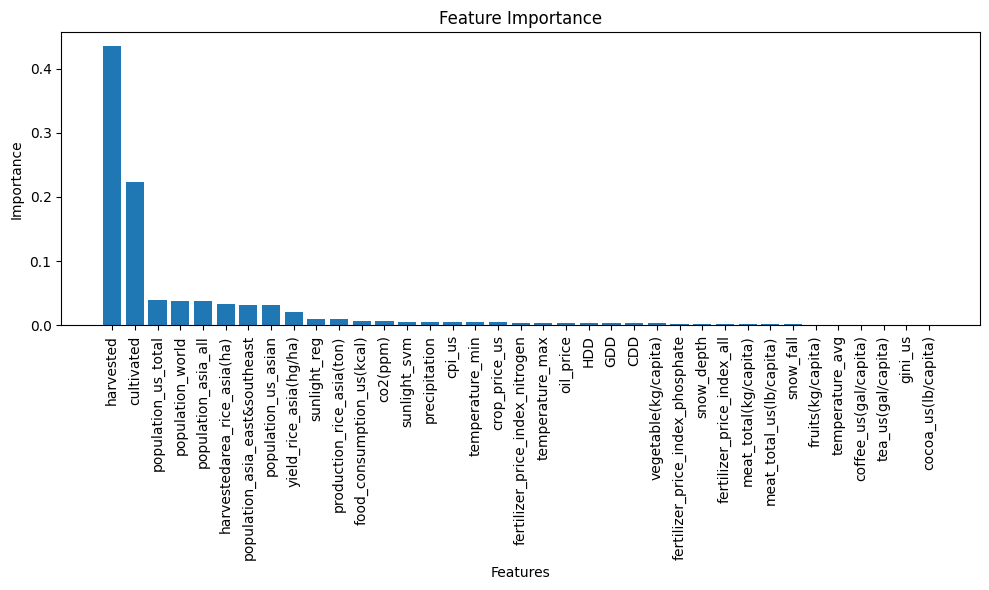

In [28]:
# 피처 중요도 계산
importances = reg.feature_importances_

# 피처 중요도를 내림차순으로 정렬
indices = np.argsort(importances)[::-1]

# 피처 이름 순서대로 정렬
feature_names = X.columns[indices]

# 그래프로 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


쌀 생산량에 중요한 feature

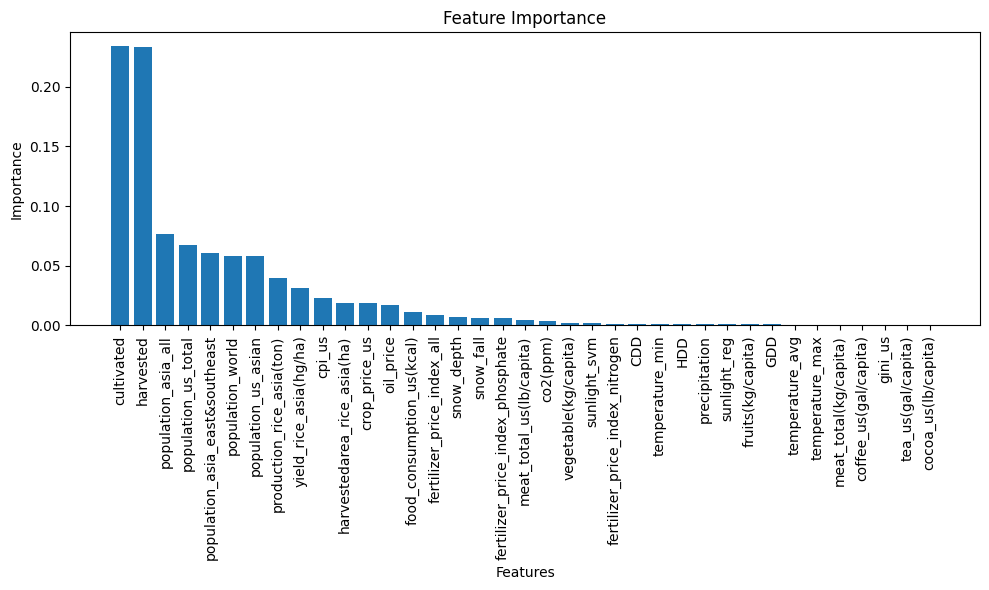

In [74]:
# 데이터셋과 타겟 설정
X = data_rice.drop(['ID', 'state', 'crop', 'productions'], axis=1)
y = data_rice['productions']

# 랜덤 포레스트 모델 학습
reg = RandomForestRegressor(n_estimators=200, max_features='sqrt')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

reg.fit(X_train, y_train)

# 피처 중요도 계산
importances = reg.feature_importances_

# 피처 중요도를 내림차순으로 정렬
indices = np.argsort(importances)[::-1]

# 피처 이름 순서대로 정렬
feature_names = X.columns[indices]

# 그래프로 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


겨울철 밀 생산량에 중요한 feature

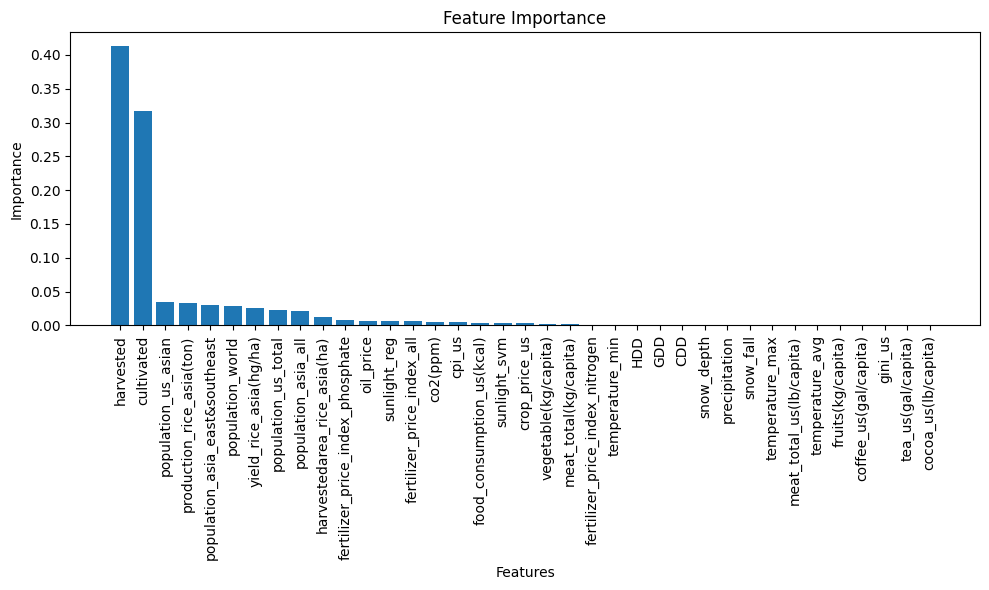

In [75]:
# 데이터셋과 타겟 설정
X = data_winter_wheat.drop(['ID', 'state', 'crop', 'productions'], axis=1)
y = data_winter_wheat['productions']

# 랜덤 포레스트 모델 학습
reg = RandomForestRegressor(n_estimators=200, max_features='sqrt')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

reg.fit(X_train, y_train)

# 피처 중요도 계산
importances = reg.feature_importances_

# 피처 중요도를 내림차순으로 정렬
indices = np.argsort(importances)[::-1]

# 피처 이름 순서대로 정렬
feature_names = X.columns[indices]

# 그래프로 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


봄철 밀 생산량에 중요한 feature

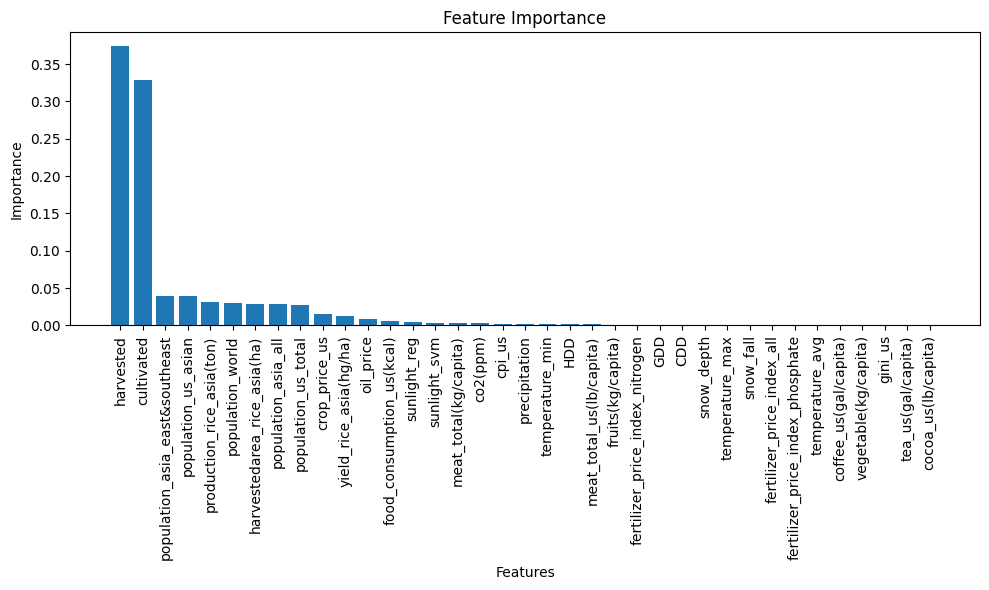

In [76]:
# 데이터셋과 타겟 설정
X = data_spring_wheat.drop(['ID', 'state', 'crop', 'productions'], axis=1)
y = data_spring_wheat['productions']

# 랜덤 포레스트 모델 학습
reg = RandomForestRegressor(n_estimators=200, max_features='sqrt')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

reg.fit(X_train, y_train)

# 피처 중요도 계산
importances = reg.feature_importances_

# 피처 중요도를 내림차순으로 정렬
indices = np.argsort(importances)[::-1]

# 피처 이름 순서대로 정렬
feature_names = X.columns[indices]

# 그래프로 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


<ipython-input-82-9470534e78b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_corn.corr())


<Axes: >

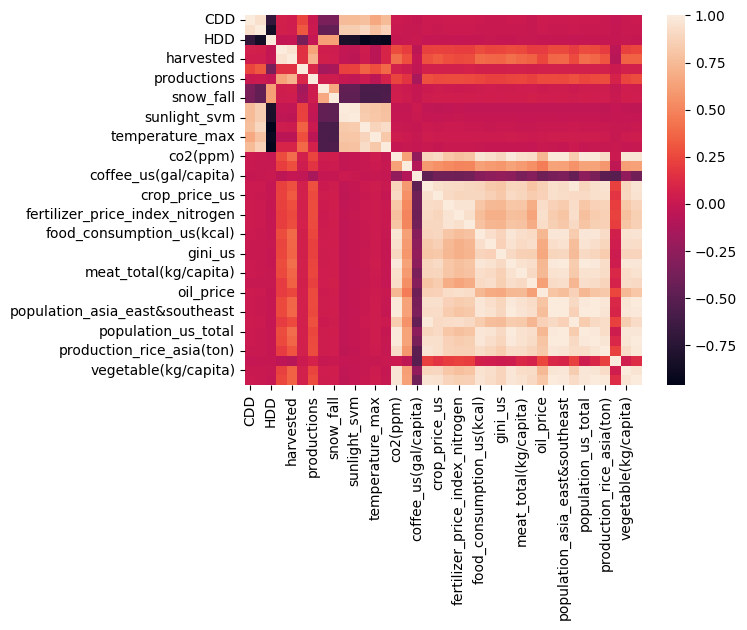

In [82]:
sns.heatmap(data_corn.corr())

<Axes: xlabel='co2(ppm)', ylabel='Density'>

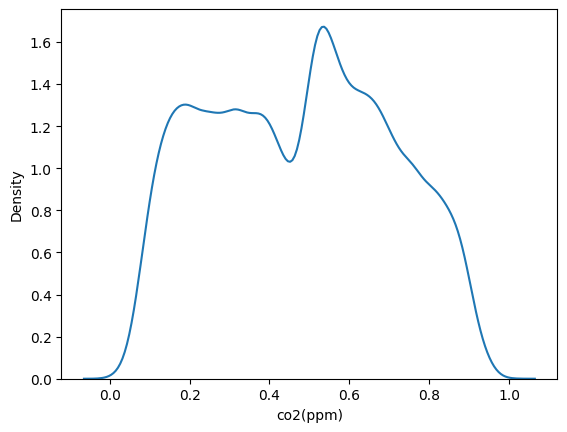

In [83]:
sns.histplot(data_corn['co2(ppm)'])